<a href="https://colab.research.google.com/github/JavierMartinezQF/ProcesosEstocasticosEnFinanzas/blob/main/ProcesosEstocasticosEnFinanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

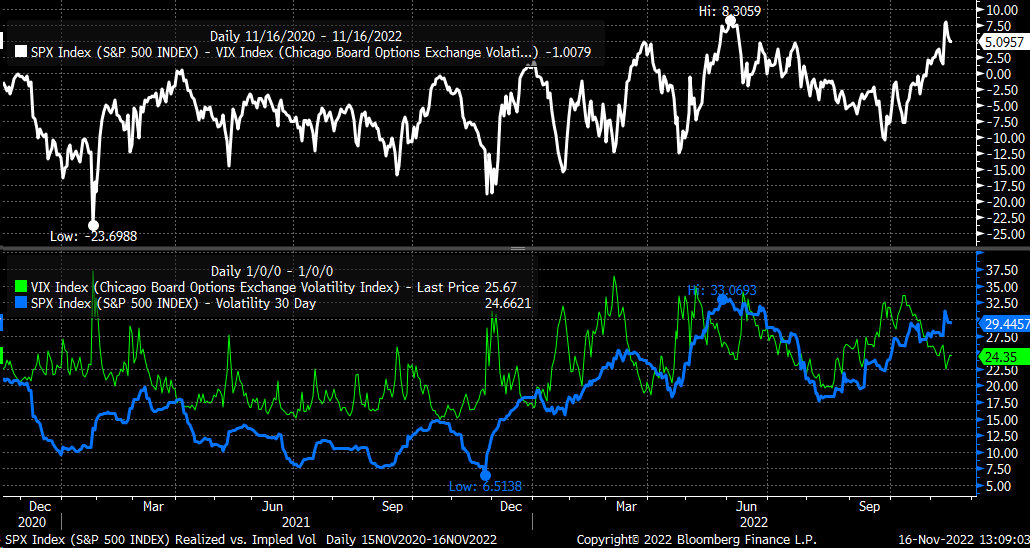

# **Procesos Estocásticos en Valuación de Activos**

> *La previsibilidad no es cómo sucederán las cosas, sino cómo pueden suceder.*  
> — Raheel Farooq

Hoy en día, la **Los procesos estocásticos** son una de las disciplinas **matemáticas y numéricas más importantes en finanzas**.

Al inicio de la era moderna de las finanzas, principalmente en las décadas de 1970 y 1980, el objetivo principal de la investigación financiera era encontrar **soluciones en forma cerrada**, por ejemplo, para el precio de opciones bajo un modelo financiero específico.

Sin embargo, los requerimientos han cambiado **drásticamente** en los últimos años. Actualmente, no solo es importante una correcta valuación de instrumentos financieros individuales, sino también una **valuación consistente de libros completos de derivados**, por ejemplo.

De manera similar, para generar **medidas de riesgo consistentes** a lo largo de toda una institución financiera —como el **valor en riesgo (VaR)** o los **ajustes de valuación por riesgo de crédito (CVA)**— es necesario tomar en cuenta **todo el portafolio de la institución y todas sus contrapartes**.

Tareas tan complejas solo pueden abordarse mediante métodos numéricos **flexibles y eficientes**. Por esta razón, los **procesos estocasticos en general** y la **simulación de Monte Carlo en particular** han adquirido un papel protagónico en el campo financiero.


# 1 NÚMEROS ALEATORIOS

Usaremos las librerías siguientes para poayarnos en la generación de Números Aleatorios

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [2]:
npr.seed(100)
np.set_printoptions(precision=4)

In [3]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [4]:
npr.rand(5,5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [5]:
a=5
b=10
npr.rand(10)*(b-a)+a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [6]:
npr.rand(5,5)*(b-a)+a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

Nímeros aleatorios uniformemente distribuidos

In [7]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

Text(0.5, 1.0, 'choice')

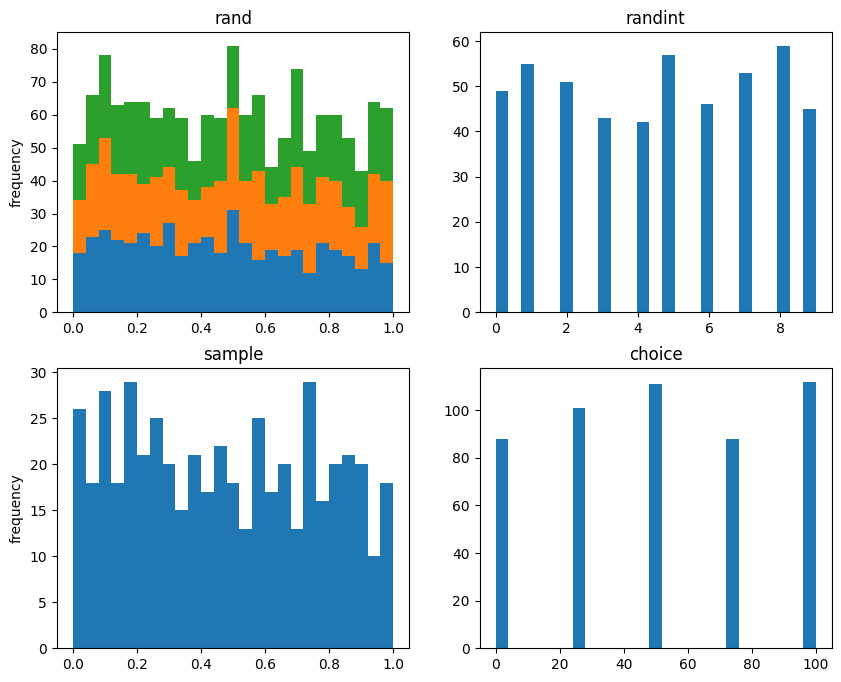

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
 figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

Aunque existe mucha crítica sobre el uso de distribuciones normales (estándar) en finanzas, estas siguen siendo una **herramienta indispensable** y continúan siendo **el tipo de distribución más ampliamente utilizado**, tanto en aplicaciones analíticas como numéricas.

Una razón es que **muchos modelos financieros se basan directa o indirectamente en una distribución normal o log-normal**.

Otra razón es que muchos modelos financieros que **no asumen directamente una distribución (log-)normal** pueden ser **discretizados** y, por lo tanto, **aproximados para propósitos de simulación** mediante el uso de la distribución normal.

Como ilustración,  **Distribuciones** visualiza muestras aleatorias de las siguientes distribuciones:

- Normal estándar con media 0 y desviación estándar 1  
- Normal con media 100 y desviación estándar 20  
- Chi-cuadrado con 0.5 grados de libertad  
- Poisson con \( \lambda = 1 \)

*Distribuciones*  muestra los resultados de las **tres distribuciones continuas** y de la distribución **discreta de Poisson**.

La distribución de Poisson se utiliza, por ejemplo, para simular la llegada de **eventos externos (raros)**, como un **salto en el precio de un instrumento** o un **shock exógeno**.




In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

Text(0.5, 1.0, 'Poisson')

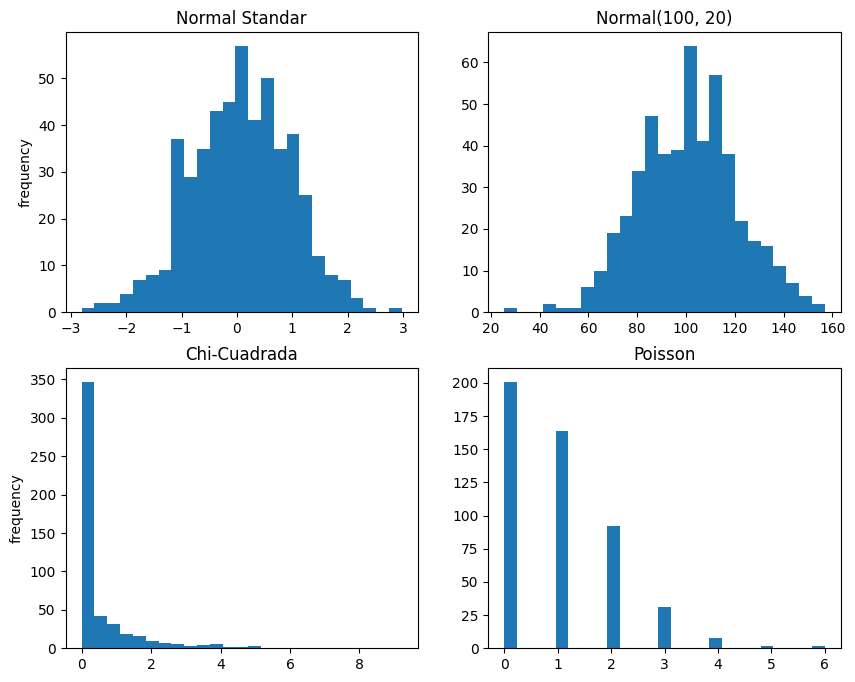

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
 figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('Normal Standar')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('Normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('Chi-Cuadrada')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

## Simulación

La **simulación de Monte Carlo (MCS)** es una de las **técnicas numéricas más importantes en finanzas**, si no es que **la más importante y ampliamente utilizada**.

Esto se debe principalmente a que es **el método numérico más flexible** cuando se trata de evaluar **expresiones matemáticas** (por ejemplo, integrales), y en particular, en la **valuación de derivados financieros**.

Esa flexibilidad, sin embargo, viene con un **costo computacional relativamente alto**, ya que a menudo se deben realizar **cientos de miles o incluso millones de cálculos complejos** para obtener una sola estimación de valor.


## Variables Aleatorias

Consideremos, por ejemplo, el modelo de **Black-Scholes-Merton** para la valuación de opciones.

En este modelo, el **nivel de un índice accionario $ S_T$ en una fecha futura $ T $, dado un nivel actual $ S_0 $, se describe según la **Ecuación**:

###  Simulación del nivel futuro del índice en el modelo de Black-Scholes-Merton
$$
\
S_T = S_0 \cdot \exp\left( \left( r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} z \right)
\
$$
Las variables y parámetros tienen el siguiente significado:

- $ S_T $: Nivel del índice en la fecha $ T $
- $ r $: Tasa libre de riesgo constante  
- $ \sigma $: Volatilidad constante (= desviación estándar de los retornos) del índice $ S $  
- $ z $: Variable aleatoria con distribución normal estándar

Este modelo financiero se parametriza y simula de la siguiente manera.


In [11]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
 sigma * math.sqrt(T) * npr.standard_normal(I))

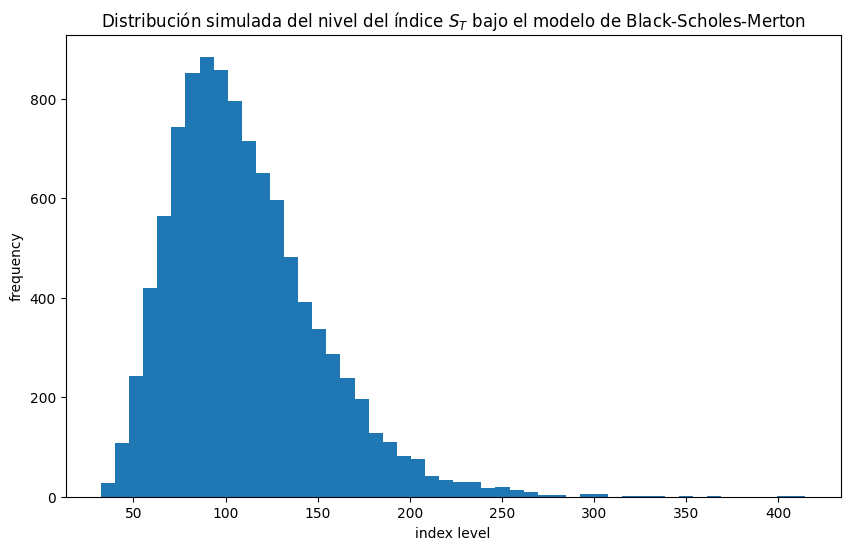

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.title('Distribución simulada del nivel del índice $S_T$ bajo el modelo de Black-Scholes-Merton')
plt.show()


La gráfica anterior sugiere que la distribución de la variable aleatoria definida es **log-normal**.

Por lo tanto, también se podría intentar utilizar la función `npr.lognormal()` para obtener directamente los valores de la variable aleatoria.

En ese caso, es necesario proporcionar a la función tanto la **media** como la **desviación estándar**.


In [13]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
 sigma * math.sqrt(T), size=I)

Text(0.5, 1.0, 'Distribución simulada del nivel del índice $S_T$ bajo el modelo de Black-Scholes-Merton, vía lognormal')

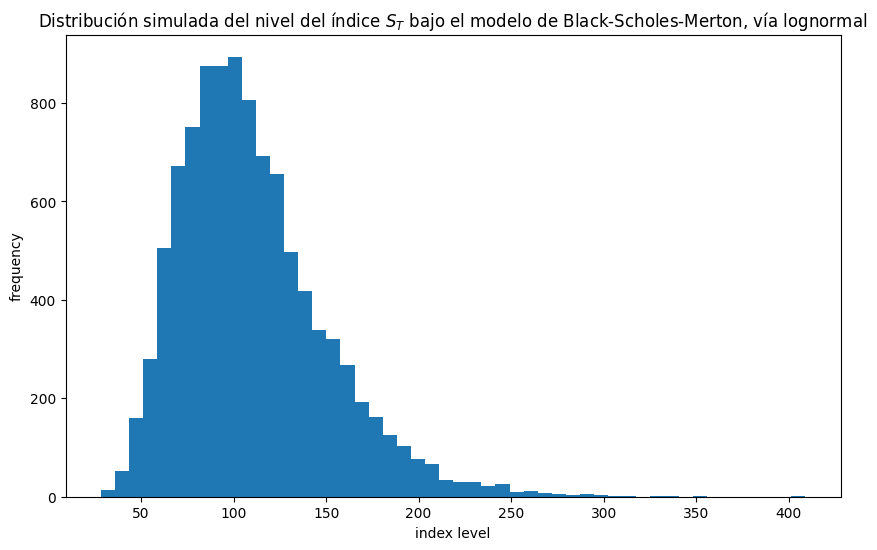

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.title('Distribución simulada del nivel del índice $S_T$ bajo el modelo de Black-Scholes-Merton, vía lognormal')

A "ojo" las dos distribuciones anteriores lucen iguales, entonces será necesario una comparación más estricta, usando los **momentos** estadísticos para ver su comportamiento real.
Nos apoyaremos de `scipy.stats ` y de la función  `print_statistics()` para ello.

In [15]:
import scipy.stats as scs

In [16]:
def print_statistics(a1, a2):
    ''' Imprime estadísticas seleccionadas.

    Parámetros
    ==========
    a1, a2: ndarray
        Objetos de resultados de una simulación
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)

    print('%14s %14s %14s' % ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


In [17]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


## Procesos Estocásticos

De forma general, un **proceso estocástico** es una **secuencia de variables aleatorias**.

En ese sentido, al simular un proceso, uno debería esperar algo similar a una **secuencia de simulaciones repetidas de una variable aleatoria**.

Esto es cierto, salvo por el hecho de que las muestras **normalmente no son independientes**, sino que **dependen del resultado de las muestras anteriores**.

Sin embargo, los procesos estocásticos utilizados en finanzas suelen cumplir con la **propiedad de Markov**, la cual establece que el **valor futuro del proceso depende únicamente del estado actual**, y **no de estados más antiguos** o del **camino completo que ha recorrido**.

A estos procesos también se les conoce como **"sin memoria"** (*memoryless*).

---

### Movimiento Browniano Geométrico

Consideremos ahora el modelo de **Black-Scholes-Merton** en su forma dinámica, descrito por la siguiente **ecuación diferencial estocástica (EDE)** en la **Ecuación 12-2**.

En esta ecuación, $ Z_t $ representa un **movimiento browniano estándar**.

La EDE se conoce como **movimiento browniano geométrico**.

Los valores de $ S_t $ están **distribuidos log-normalmente**, y los **rendimientos marginales** $ \frac{dS_t}{S_t} $ están **distribuidos normalmente**.

---

###  Ecuación diferencial estocástica en el modelo de Black-Scholes-Merton
$$
\
dS_t = r S_t \, dt + \sigma S_t \, dZ_t
\
$$

La **EDE** de la **Ecuación 12-2** puede ser discretizada **exactamente** mediante un esquema de **Euler**.

Dicho esquema se presenta en la **Ecuación 12-3**, donde $ \Delta t $ es el intervalo de discretización fijo y $ z_t $ es una variable aleatoria con distribución normal estándar.

---

### Simulación dinámica del nivel del índice en el modelo de Black-Scholes-Merton
$$
\
S_t = S_{t - \Delta t} \cdot \exp\left( \left( r - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} \cdot z_t \right)
\
$$
---

Como antes, **la traducción de esta ecuación a código en Python y NumPy es directa**.

Los valores finales resultantes del nivel del índice están nuevamente **distribuidos log-normalmente**, como lo ilustra la **Figura 12-5**.

Los **primeros cuatro momentos** también son bastante cercanos a los obtenidos mediante el enfoque de simulación estática.




In [18]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
 S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
 sigma * math.sqrt(dt) * npr.standard_normal(I))

Text(0.5, 1.0, 'Movimiento Browniano Geométrico simulado a "maturity"')

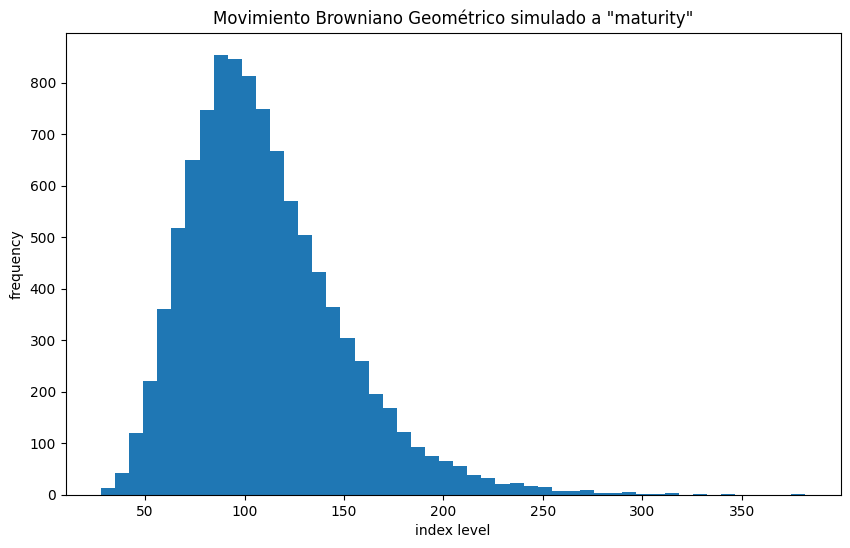

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.title('Movimiento Browniano Geométrico simulado a "maturity"')

Comparación de las estadísticas de la simulación estática vs la simulación dinámica

In [20]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


Text(0.5, 1.0, 'Trayectorias del Movimiento Browniano Geométrico simuladas dinamicamente')

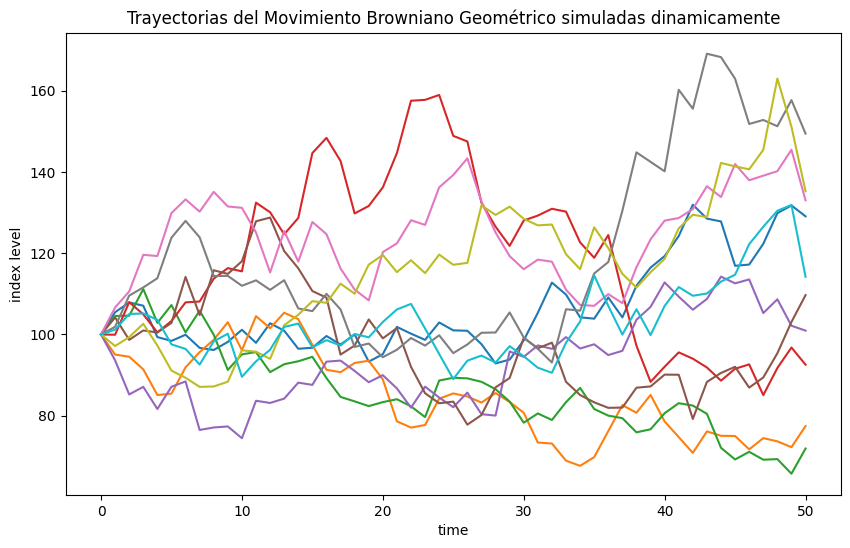

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Trayectorias del Movimiento Browniano Geométrico simuladas dinamicamente')

## Simulación Dinámica y Difusión de Raíz Cuadrada

Usar el **enfoque de simulación dinámica** no solo permite visualizar trayectorias como hemos visto, sino también **valorar opciones con ejercicio americano o bermuda**, u **opciones cuyo pago depende de la trayectoria del subyacente**.

Es decir, se obtiene una imagen completa de la evolución del proceso a lo largo del tiempo.

---

### Difusión de Raíz Cuadrada

Otra clase importante de procesos financieros son los **procesos con reversión a la media**, los cuales se utilizan, por ejemplo, para modelar **tasas de interés de corto plazo** o **procesos de volatilidad**.

Un modelo popular y ampliamente utilizado es la **difusión de raíz cuadrada**, propuesto por **Cox, Ingersoll y Ross (1985)**. La **Ecuación +++** presenta su correspondiente **ecuación diferencial estocástica (EDE)**.

#### Ecuación +++. EDE para la difusión de raíz cuadrada
$$
\
dx_t = \kappa (\theta - x_t) \, dt + \sigma \sqrt{x_t} \, dZ_t
\
$$
---

Las variables y parámetros tienen el siguiente significado:

- $ x_t $: Nivel del proceso en el tiempo $ t $  
- $ \kappa $: Factor de reversión a la media  
- $ \theta $: Media de largo plazo del proceso  
- $ \sigma $: Volatilidad constante  
- $ Z_t $: Movimiento Browniano estándar

---

Se sabe que los valores de $ x_t $ están **distribuidos como chi-cuadrada**. Sin embargo, como se mencionó anteriormente, muchos modelos financieros pueden ser **discretizados y aproximados** usando la distribución normal, es decir, mediante un **esquema de discretización tipo Euler**.

Aunque el **esquema de Euler es exacto** para el **movimiento browniano geométrico**, resulta **sesgado para la mayoría de los otros procesos estocásticos**.

Incluso si existe un esquema exacto —uno será presentado más adelante para la difusión de raíz cuadrada— puede ser deseable usar el esquema de Euler por **razones numéricas o computacionales**.

Definiendo $ s = t - \Delta t $ y $ x^+ \equiv \max(x, 0) $, la **Ecuación xx** presenta un esquema de Euler de este tipo. Este esquema particular se conoce en la literatura como **"truncación total"** (*full truncation*) (ver Hilpisch (2015) para más detalles y otros esquemas).

---

### Ecuación xx. Discretización de Euler para la difusión de raíz cuadrada
$$
\
\tilde{x}_t = \tilde{x}_s + \kappa \left( \theta - \tilde{x}_s^+ \right) \Delta t + \sigma \sqrt{\tilde{x}_s^+} \sqrt{\Delta t} \cdot z_t
\
$$
---

La **difusión de raíz cuadrada** tiene la característica útil y realista de que los valores de $ x_t $ permanecen **estrictamente positivos**.

Sin embargo, al discretizar mediante un **esquema de Euler**, **no se puede garantizar que los valores sean positivos**, por lo cual se trabaja siempre con la **versión positiva** del proceso simulado.

Por esta razón, en el código de simulación se necesitan **dos objetos `ndarray` en lugar de uno solo**.

 **Gráficamente los resultados de la simulación** como un histograma.


In [22]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [23]:
def srd_euler():
    xh = np.zeros((M + 1, I))  # valores intermedios no truncados
    x = np.zeros_like(xh)      # valores truncados (positivos)
    xh[0] = x0
    x[0] = x0

    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                 + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t - 1], 0))
                 * math.sqrt(dt) * npr.standard_normal(I))
        x[t] = np.maximum(xh[t], 0)

    return x

# Llamada a la función
x1 = srd_euler()


Text(0.5, 1.0, 'Distribución simulada de la difusión de raíz cuadrada')

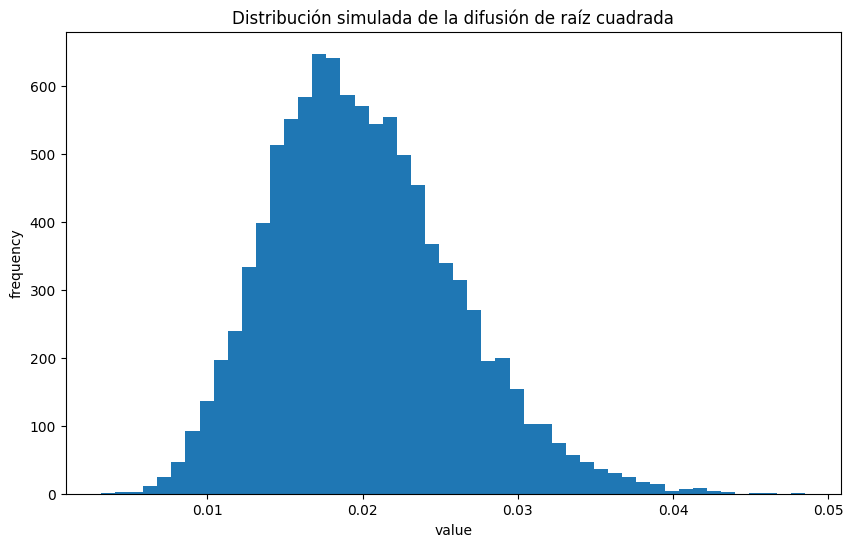

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Distribución simulada de la difusión de raíz cuadrada')

Ahora se muestran las **primeras 10 trayectorias simuladas**, lo cual ilustra el **promedio de deriva negativa** resultante (debido a que $ x_0 > \theta $) y la **convergencia hacia $ \theta = 0.02 $**.


Text(0.5, 1.0, 'Trayectorias simuladas de la difusión de raíz cuadrada')

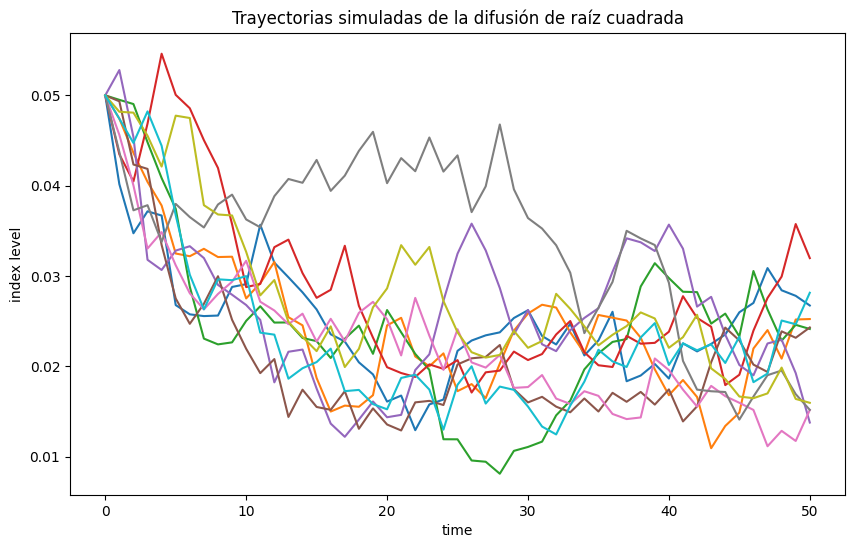

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Trayectorias simuladas de la difusión de raíz cuadrada')

###  Esquema de Discretización Exacta para la Difusión de Raíz Cuadrada

El **esquema de discretización exacta** para la **difusión de raíz cuadrada**, basado en la **distribución chi-cuadrado no central** $ \chi'^2_d $, con:

- **Grados de libertad**:
$$
  \
  df = \frac{4 \theta \kappa}{\sigma^2}
  \
$$
- **Parámetro de no centralidad**:  
$$
  \
  nc = \frac{4 \kappa e^{-\kappa \Delta t}}{\sigma^2 (1 - e^{-\kappa \Delta t})} \cdot x_s
  \
$$
Y el valor simulado del proceso viene dado por:
$$
\
x_t = \frac{\sigma^2 (1 - e^{-\kappa \Delta t})}{4\kappa} \cdot \chi'^2_d(nc)
\
$$



In [26]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

Text(0.5, 1.0, 'Difusión de raíz cuadrada simulada dinámicamente al vencimiento (esquema exacto)')

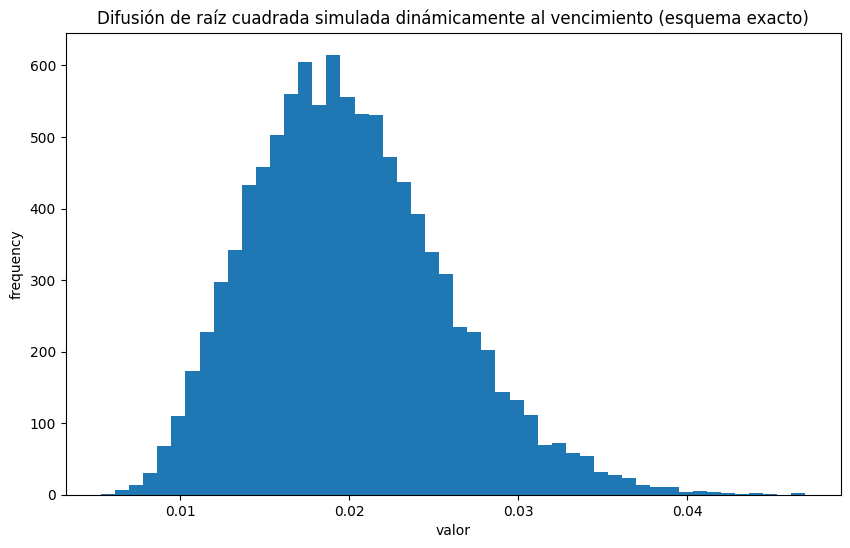

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('valor')
plt.ylabel('frequency')
plt.title('Difusión de raíz cuadrada simulada dinámicamente al vencimiento (esquema exacto)')

Text(0.5, 1.0, 'Trayectorias de la Difusión de raíz cuadrada simulada dinámicamente al vencimiento (esquema exacto)')

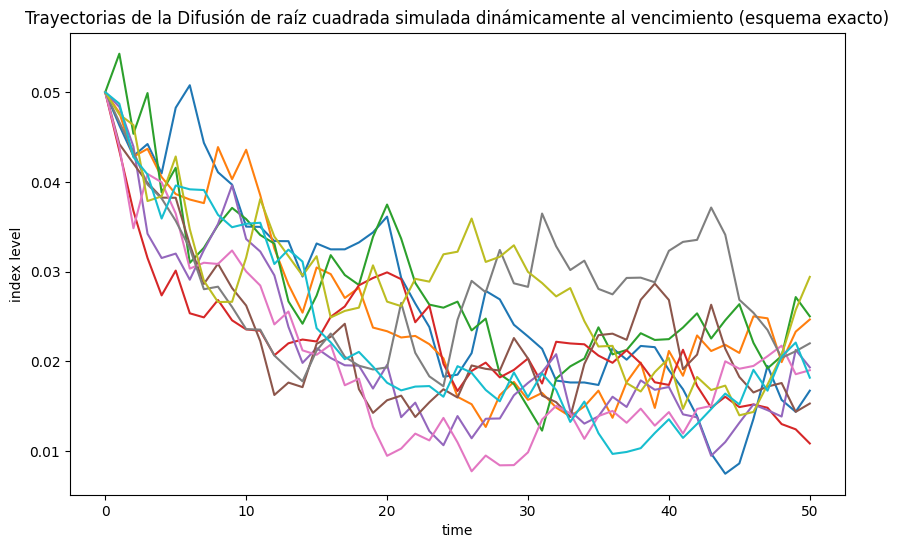

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Trayectorias de la Difusión de raíz cuadrada simulada dinámicamente al vencimiento (esquema exacto)')

In [29]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.005
           max          0.049          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.529          0.532
      kurtosis          0.289          0.273


In [30]:
I = 250000
%time x1 = srd_euler()

CPU times: user 880 ms, sys: 137 ms, total: 1.02 s
Wall time: 2.74 s


In [31]:
%time x2 = srd_exact()

CPU times: user 1.97 s, sys: 70 ms, total: 2.04 s
Wall time: 2.57 s


In [32]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.071          0.055
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.563          0.579
      kurtosis          0.492          0.520


Sin embargo, se puede observar una **diferencia importante en términos de velocidad de ejecución**, ya que **muestrear desde la distribución chi-cuadrado no central** es **más costoso computacionalmente** que hacerlo desde la distribución normal estándar.

El **esquema exacto** toma aproximadamente **el doble de tiempo** para obtener **prácticamente los mismos resultados** que con el esquema de Euler.


## Volatilidad Estocástica

Una de las **principales suposiciones simplificadoras** del modelo de **Black-Scholes-Merton** es que la **volatilidad es constante**.

Sin embargo, en la práctica, la **volatilidad no es constante ni determinista** —es **estocástica**.

Por lo tanto, un avance importante en el modelado financiero se logró a comienzos de la década de 1990 con la introducción de los llamados **modelos de volatilidad estocástica**.

Uno de los modelos más populares dentro de esta categoría es el modelo de **Heston (1993)**.

---

###  Ecuaciones diferenciales estocásticas del modelo de volatilidad estocástica de Heston
$$
\
\begin{aligned}
dS_t &= r S_t \, dt + \sqrt{v_t} S_t \, dZ_t^{(1)} \\
dv_t &= \kappa_v (\theta_v - v_t) \, dt + \sigma_v \sqrt{v_t} \, dZ_t^{(2)} \\
dZ_t^{(1)} \cdot dZ_t^{(2)} &= \rho \, dt
\end{aligned}
\
$$
---

El significado de las variables y parámetros puede deducirse fácilmente a partir de la discusión sobre el **movimiento browniano geométrico** y la **difusión de raíz cuadrada**.

El parámetro $ \rho $ representa la **correlación instantánea entre los dos movimientos brownianos estándar** $ Z_t^{(1)} $ y $ Z_t^{(2)} $.

Esto permite incorporar un fenómeno estilizado conocido como el **efecto apalancamiento (leverage effect)**, el cual establece que:

- La **volatilidad tiende a subir en tiempos de estrés** (mercados a la baja),
- Y a **bajar en mercados alcistas** (mercados en alza).

---

Consideremos ahora una **parametrización específica** del modelo.

Para incorporar la **correlación entre los dos procesos estocásticos**, es necesario calcular la **descomposición de Cholesky** de la matriz de correlación.


In [33]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [34]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)  # Matriz de Cholesky

In [35]:
cho_mat  # Matriz de Cholesky


array([[1. , 0. ],
       [0.6, 0.8]])

Antes de iniciar la simulación de los procesos estocásticos, se **genera todo el conjunto de números aleatorios** para ambos procesos.

Se utilizará el **conjunto 0** para el **proceso del índice** y el **conjunto 1** para el **proceso de volatilidad**.

Para el proceso de volatilidad, modelado mediante una **difusión de raíz cuadrada**, se elige el **esquema de Euler**, teniendo en cuenta la **correlación a través de la matriz de Cholesky**.


In [36]:
M = 50
I = 10000
dt = T / M

In [37]:
ran_num = npr.standard_normal((2, M + 1, I))

In [38]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [39]:
v[0] = v0
vh[0] = v0

In [40]:
for t in range(1, M + 1):
 ran = np.dot(cho_mat, ran_num[:, t, :])
 vh[t] = (vh[t - 1] +
    kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
    sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
    math.sqrt(dt) * ran[1])

In [41]:
v=np.maximum(vh,0)

La **simulación del proceso del nivel del índice** también toma en cuenta la **correlación**, y utiliza (en este caso) el **esquema de Euler exacto** para el **movimiento browniano geométrico**.

Se muestra los resultados de la simulación al vencimiento en forma de **histograma**, tanto para el **proceso del índice** como para el **proceso de volatilidad**.


In [42]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

Text(0.5, 1.0, 'Proceso de volatilidad estocástica simulado dinámicamente al vencimiento')

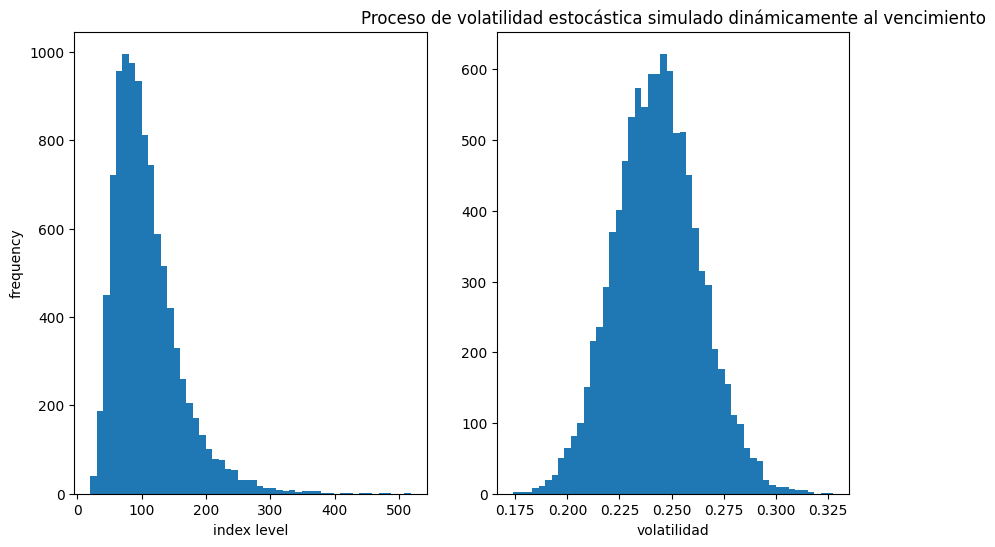

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatilidad')
plt.title('Proceso de volatilidad estocástica simulado dinámicamente al vencimiento')

Esto ilustra otra ventaja de trabajar con el **esquema de Euler** para la **difusión de raíz cuadrada**:

La **correlación se incorpora de manera sencilla y coherente**, ya que solo se generan números aleatorios con distribución normal estándar.

No existe una forma simple de lograr lo mismo si se utiliza un **enfoque mixto** (es decir, **Euler para el índice** y el **método exacto basado en la distribución chi-cuadrado no central** para el proceso de volatilidad).

---

Una inspección de las **primeras 10 trayectorias simuladas** de cada proceso muestra que:

- El proceso de volatilidad tiene una **deriva positiva en promedio**,
- Y que, como se esperaba, **converge hacia $ \theta = 0.25 $**.


In [44]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.556          0.174
           max        517.798          0.328
          mean        107.843          0.243
           std         51.341          0.020
          skew          1.577          0.124
      kurtosis          4.306          0.048


Text(0.5, 1.0, 'Trayectorias del proceso de volatilidad estocástica simuladas dinámicamente')

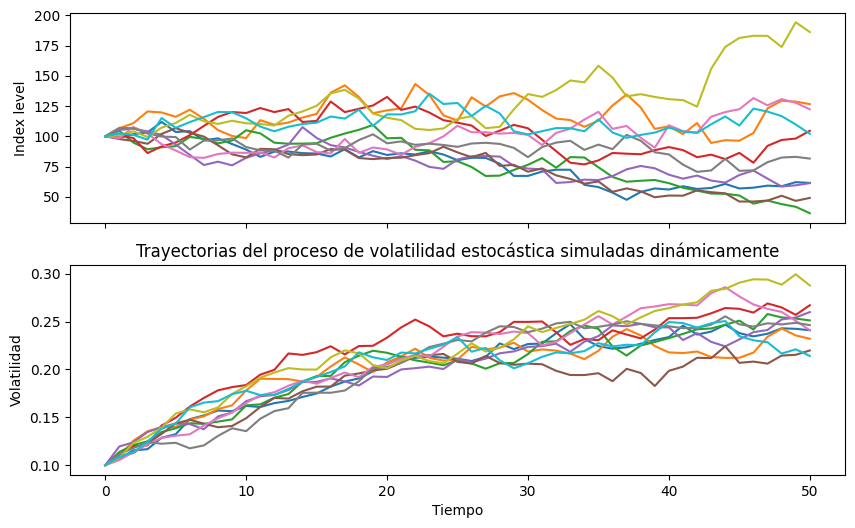

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('Index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Volatilidad')
plt.title('Trayectorias del proceso de volatilidad estocástica simuladas dinámicamente')

Al echar un vistazo rápido a las **estadísticas en la fecha de vencimiento** para ambos conjuntos de datos, se observa un **valor máximo bastante alto** para el **proceso del nivel del índice**.

De hecho, este valor es **mucho mayor** de lo que podría alcanzar un **movimiento browniano geométrico con volatilidad constante**, **ceteris paribus** (es decir, manteniendo todo lo demás constante).


## Difusión con Saltos (*Jump Diffusion*)

La **volatilidad estocástica** y el **efecto apalancamiento** son hechos estilizados (empíricos) observados en varios mercados.

Otro hecho estilizado importante es la **existencia de saltos** en los **precios de los activos** y, por ejemplo, en la **volatilidad**.

En 1976, **Merton** publicó su modelo de **difusión con saltos**, mejorando el enfoque de Black-Scholes-Merton mediante un **componente que genera saltos** con **distribución log-normal**.

La EDE bajo la **medida neutral al riesgo** se presenta de la siguiente manera:

---

### Ecuación diferencial estocástica para el modelo de difusión con saltos de Merton
$$
\
dS_t = (r - r_J) S_t \, dt + \sigma S_t \, dZ_t + J_t S_t \, dN_t
\
$$
---

### Significado de las variables y parámetros:

- $ S_t $: Nivel del índice en el tiempo $ t $
- $ r $: Tasa libre de riesgo constante  
- $ r_J \equiv \lambda \cdot (e^{\mu_J + \delta^2 / 2} - 1) $:  
  Corrección por deriva de los saltos para mantener la neutralidad al riesgo  
- $ \sigma $: Volatilidad constante del índice $ S $  
- $ Z_t $: Movimiento Browniano estándar  
- $ J_t $: Tamaño del salto en $ t $, con la siguiente distribución:  
$$
  \
  \log(1 + J_t) \sim \mathcal{N}\left( \log(1 + \mu_J) - \frac{\delta^2}{2}, \, \delta^2 \right)
  \
$$
- $ N_t $: Proceso de Poisson con intensidad $ \lambda $

---

### Discretización de Euler para el modelo de difusión con saltos de Merton
$$
\
S_t = S_{t - \Delta t} \cdot \left( e^{(r - r_J - \sigma^2 / 2) \Delta t + \sigma \sqrt{\Delta t} z_t^{(1)}}
+ (e^{\mu_J + \delta z_t^{(2)}} - 1) \cdot y_t \right)
\
$$
Donde:

- $ z_t^{(1)}, z_t^{(2)} \sim \mathcal{N}(0, 1) $: variables aleatorias normales estándar  
- $ y_t \sim \text{Poisson}(\lambda \cdot \Delta t) $: número de saltos en el intervalo $ \Delta t $

---

Este modelo permite simular **saltos bruscos e impredecibles** en los precios, representando mejor los comportamientos extremos observados en los mercados reales.


In [46]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [47]:
T = 1.0
M = 50
I = 10000
dt = T / M

Esta vez, se necesitan **tres conjuntos de números aleatorios**.

Observemos en la figura el **segundo pico** (distribución de frecuencia **bimodal**), el cual se debe a los **saltos**.


In [48]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                sigma * math.sqrt(dt) * sn1[t]) +
                (np.exp(mu + delta * sn2[t]) - 1) *
                poi[t])
    S[t] = np.maximum(S[t], 0)

Text(0.5, 1.0, 'Proceso de difusión con saltos simulado dinámicamente al vencimiento')

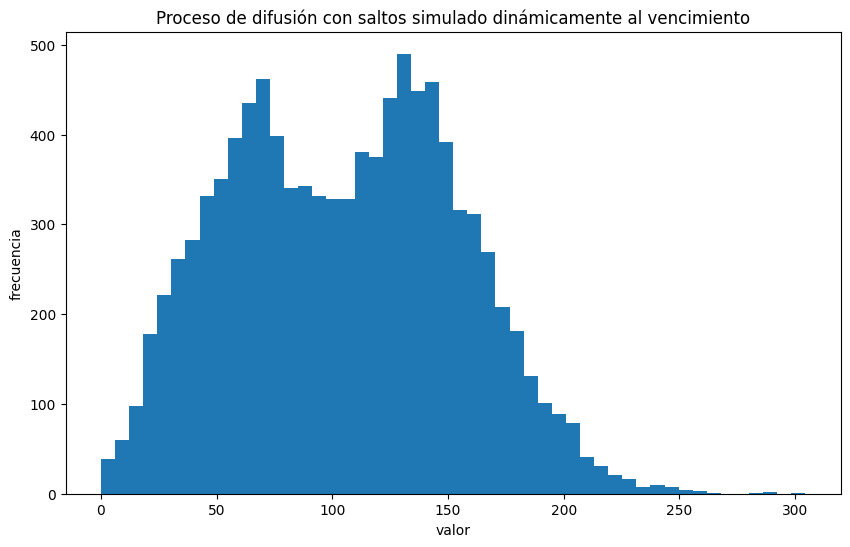

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('valor')
plt.ylabel('frecuencia')
plt.title('Proceso de difusión con saltos simulado dinámicamente al vencimiento')

Text(0.5, 1.0, 'Trayectorias del Proceso de difusión con saltos simulado dinámicamente al vencimiento')

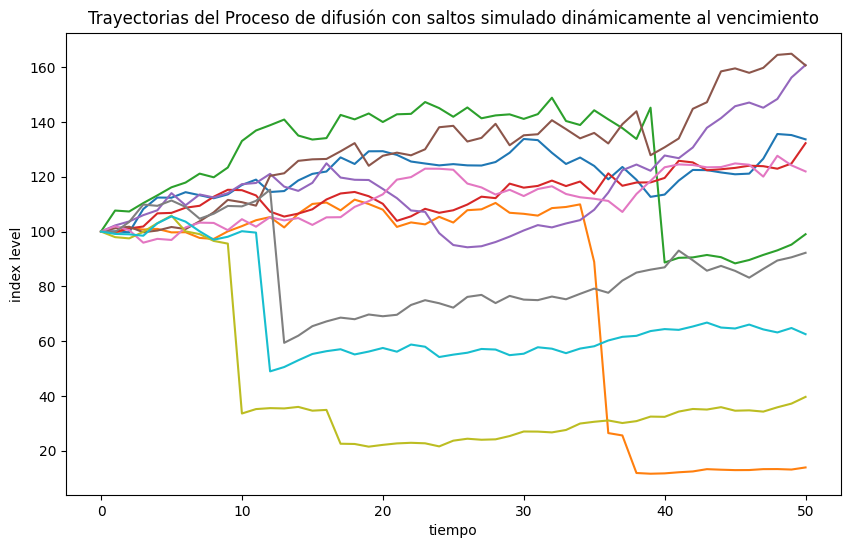

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('tiempo')
plt.ylabel('index level')
plt.title('Trayectorias del Proceso de difusión con saltos simulado dinámicamente al vencimiento')

## Reducción de Varianza

Debido a que las funciones de Python utilizadas hasta ahora **generan números pseudoaleatorios**, y a la **variabilidad en el tamaño de las muestras extraídas**, los conjuntos de números resultantes pueden **no reflejar estadísticas lo suficientemente cercanas a las esperadas o deseadas**.

Por ejemplo, se esperaría que un conjunto de números aleatorios con distribución normal estándar tenga una **media de 0** y una **desviación estándar de 1**.

Veamos qué estadísticas presentan diferentes conjuntos de números aleatorios.

Para lograr una comparación realista, se **fija el valor de la semilla** del generador de números aleatorios.


In [51]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [52]:
i ** 2 * 10000

8410000

Los resultados muestran que las estadísticas **"mejoran de alguna manera"** a medida que aumenta el número de muestras extraídas.  
Sin embargo, **aún no coinciden con los valores deseados**, incluso en nuestra muestra más grande con más de **8,000,000 de números aleatorios**.

Afortunadamente, existen **técnicas genéricas de reducción de varianza** fáciles de implementar que ayudan a mejorar la coincidencia con los **primeros dos momentos** de la **distribución normal (estándar)**.

La primera técnica es el uso de **variables antitéticas** (*antithetic variates*).  
Este enfoque simplemente **extrae la mitad del número deseado de números aleatorios** y luego **añade el mismo conjunto pero con el signo opuesto**.

Por ejemplo, si el generador de números aleatorios (es decir, la función de Python correspondiente) genera un 0.5, entonces se añade otro número con valor –0.5 al conjunto.  
**Por construcción, el valor medio de este conjunto de datos debe ser igual a cero.**

Con **NumPy**, esto puede implementarse de forma concisa utilizando la función `np.concatenate()`.

A continuación, se repite el ejercicio anterior, esta vez **usando variables antitéticas**:


In [53]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))

In [54]:
np.shape(sn)

(10000,)

In [55]:
sn.mean()

np.float64(2.842170943040401e-18)

In [56]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
-0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


Como se puede notar de inmediato, este enfoque **corrige perfectamente el primer momento** —lo cual **no debería sorprender**, dado cómo se construye el conjunto de datos.

Sin embargo, este método **no tiene ningún efecto sobre el segundo momento**, es decir, sobre la **desviación estándar**.

Para corregir **tanto el primer como el segundo momento en un solo paso**, se puede utilizar otra técnica de reducción de varianza llamada **ajuste de momentos** (*moment matching*).


In [57]:
sn = npr.standard_normal(10000)

In [58]:
sn.mean()

np.float64(-0.001165998295162494)

In [59]:
sn.std()

np.float64(0.991255920204605)

In [60]:
sn_new=(sn-sn.mean()/sn.std())

In [61]:
sn_new.mean()

np.float64(1.0285519537756116e-05)

In [62]:
sn_new.std()

np.float64(0.991255920204605)

Al **restar la media** a cada número aleatorio y luego **dividir cada número por la desviación estándar**, esta técnica asegura que el conjunto de números aleatorios **coincida (casi) perfectamente con los primeros dos momentos deseados** de la distribución normal estándar.

---

La siguiente función **aprovecha este principio de las técnicas de reducción de varianza** y genera números aleatorios con distribución normal estándar para simulación de procesos, utilizando **dos, una o ninguna técnica de reducción de varianza**.


In [63]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    '''
    Genera números aleatorios para simulación.

    Parámetros
    ==========
    M: int
        Número de intervalos de tiempo para la discretización
    I: int
        Número de trayectorias a simular
    anti_paths: bool
        Uso de variables antitéticas
    mo_match: bool
        Uso de ajuste de momentos
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))

    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()

    return sn


# Valuación  

### Aplicación: Valuación de Derivados

Una de las aplicaciones más importantes de la simulación de Monte Carlo es la **valuación de activos contingentes** (opciones, derivados, instrumentos híbridos, etc.).

De forma simple, en un **mundo neutral al riesgo**, el valor de un activo contingente es la **esperanza descontada de su pago** bajo la **medida neutral al riesgo** (también llamada medida martingala).

Esta es la medida de probabilidad que hace que todos los factores de riesgo (acciones, índices, etc.) **tengan deriva igual a la tasa libre de riesgo**, convirtiendo los procesos descontados en **martingalas**.

Según el **Teorema Fundamental de Valuación de Activos**, la existencia de esta medida es equivalente a la **ausencia de oportunidades de arbitraje**.

---

### Opciones Financieras

Una **opción financiera** otorga el derecho (pero no la obligación) de **comprar** (opción *call*) o **vender** (opción *put*) un instrumento financiero específico:

- En una fecha determinada (*opción europea*), o  
- Durante un periodo de tiempo (*opción americana*),  
- A un precio pactado (*precio de ejercicio* o *strike price*).

Primero consideraremos el caso más simple: **opciones europeas** en términos de valuación.

---

## Opciones Europeas

El pago (payoff) de una opción *call* europea sobre un índice en el vencimiento está dado por:
$$
\
h(S_T) \equiv \max(S_T - K, 0)
\
$$
donde:

- $ S_T $: Nivel del índice en la fecha de vencimiento $ T $  
- $ K $: Precio de ejercicio (strike)

Dada una medida neutral al riesgo (o **la** medida neutral al riesgo en mercados completos) para el proceso estocástico relevante (por ejemplo, **movimiento browniano geométrico**), el precio de esta opción está dado por la siguiente fórmula:

---

### Valuación por expectativa bajo medida neutral al riesgo
$$
\
C_0 = e^{-rT} \mathbb{E}^{\mathbb{Q}}[h(S_T)] = e^{-rT} \int_0^{\infty} h(s) q(s) \, ds
\
$$
---


La ecuación siguiente muestra el **estimador de Monte Carlo bajo medida neutral al riesgo** para una opción europea, donde $\tilde{S}_T^i $ es el valor simulado del índice en el vencimiento para la trayectoria $ i $.

---

### Estimador de Monte Carlo bajo medida neutral al riesgo
$$
\
\hat{C}_0 = e^{-rT} \cdot \frac{1}{I} \sum_{i=1}^{I} h\left( \tilde{S}_T^i \right)
\
$$
---

Consideremos ahora una **parametrización** del movimiento browniano geométrico y una función de valuación `gbm_mcs_stat()`, que recibe como parámetro únicamente el **precio de ejercicio** (*strike*).

En este caso, **solo se simula el nivel del índice en el vencimiento**.

Como referencia, se analiza el caso con un **precio de ejercicio $K = 105 $**.


In [64]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [65]:
def gbm_mcs_stat(K):
    '''
    Valuación de una opción europea tipo call en el modelo Black-Scholes-Merton
    mediante simulación de Monte Carlo (a partir del nivel del índice en el vencimiento).

    Parámetros
    ==========
    K: float
        Precio de ejercicio (strike) positivo de la opción

    Retorna
    =======
    C0: float
        Valor presente estimado de la opción europea tipo call
    '''
    sn = gen_sn(1, I)  # genera números aleatorios estándar

    # Simulación del nivel del índice en el vencimiento
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])

    # Cálculo del payoff al vencimiento
    hT = np.maximum(ST - K, 0)

    # Estimador de Monte Carlo
    C0 = math.exp(-r * T) * np.mean(hT)

    return C0


In [66]:
gbm_mcs_stat(K=105)

np.float64(10.044221852841922)

A continuación, consideremos el **enfoque de simulación dinámica** y permitamos también la valuación de **opciones europeas tipo put**, además de las tipo call.

La función `gbm_mcs_dyna()` implementa este algoritmo.

El código también **compara las estimaciones del precio de una opción call y una put con el mismo precio de ejercicio**.


In [67]:
M=50

In [68]:
def gbm_mcs_dyna(K, option='call'):
    '''
    Valuación de opciones europeas en el modelo Black-Scholes-Merton
    mediante simulación de Monte Carlo (trayectorias del nivel del índice).

    Parámetros
    ==========
    K: float
        Precio de ejercicio (strike) positivo de la opción
    option: string
        Tipo de opción a valorar ('call' o 'put')

    Retorna
    =======
    C0: float
        Valor presente estimado de la opción europea
    '''
    dt = T / M

    # Simulación de trayectorias del nivel del índice
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)

    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                 + sigma * math.sqrt(dt) * sn[t])

    # Cálculo del payoff según el tipo de opción
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)

    # Estimación de Monte Carlo
    C0 = math.exp(-r * T) * np.mean(hT)

    return C0


In [69]:
gbm_mcs_dyna(K=110., option='call')

np.float64(7.950008525028434)

In [70]:
gbm_mcs_dyna(K=110., option='put')

np.float64(12.629934942682004)

La pregunta es **qué tan bien funcionan estos enfoques de valuación basados en simulación** en comparación con el **valor de referencia** obtenido mediante la **fórmula de valuación de Black-Scholes-Merton**.

Para averiguarlo, el siguiente código **genera los valores/estimaciones de opciones correspondientes para un rango de precios de ejercicio**, utilizando la **fórmula analítica de valuación de opciones europeas tipo call** que se encuentra en el módulo `bsm_functions.py`.

Primero, se comparan los **resultados del enfoque de simulación estática** con los **valores analíticos exactos**:


In [79]:
#bsm_functions.py
# Valuación de opciones call europeas en el modelo BSM
# Incluye funciones para el cálculo del vega y volatilidad implícita

from math import log, sqrt, exp
from scipy import stats

def bsm_call_value(S0, K, T, r, sigma):
    '''
    Valuación de opción europea tipo call en el modelo de Black-Scholes-Merton.
    Fórmula analítica.

    Parámetros
    ==========
    S0 : float
        Nivel inicial del índice o acción
    K : float
        Precio de ejercicio (strike)
    T : float
        Tiempo a vencimiento (en fracciones de año)
    r : float
        Tasa libre de riesgo (constante)
    sigma : float
        Volatilidad (desviación estándar del retorno)

    Retorna
    =======
    value : float
        Valor presente de la opción call europea
    '''
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
             K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value
################################################################################
################################################################################
def bsm_vega(S0, K, T, r, sigma):
    '''
    Vega de una opción europea en el modelo BSM.
    Derivada parcial del valor de la opción con respecto a sigma.

    Parámetros
    ==========
    S0 : float
        Nivel inicial del índice o acción
    K : float
        Precio de ejercicio (strike)
    T : float
        Tiempo a vencimiento (en fracciones de año)
    r : float
        Tasa libre de riesgo (constante)
    sigma : float
        Volatilidad (desviación estándar del retorno)

    Retorna
    =======
    vega : float
        Sensibilidad del precio de la opción respecto a la volatilidad
    '''
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega
################################################################################
################################################################################
################################################################################
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    '''
    Volatilidad implícita de una opción call europea en el modelo BSM.

    Parámetros
    ==========
    S0 : float
        Nivel inicial del índice o acción
    K : float
        Precio de ejercicio (strike)
    T : float
        Tiempo a vencimiento (en fracciones de año)
    r : float
        Tasa libre de riesgo (constante)
    C0 : float
        Precio de mercado de la opción
    sigma_est : float
        Estimación inicial de la volatilidad implícita
    it : int
        Número de iteraciones

    Retorna
    =======
    sigma_est : float
        Volatilidad implícita estimada numéricamente
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est


# ---------------------

In [80]:
# [73] Inicializar listas de resultados y parámetros
stat_res = []
dyna_res = []
anal_res = []

k_list = np.arange(80., 120.1, 5.)
np.random.seed(100)


In [81]:
# [74] Ejecutar simulaciones y valoraciones para cada strike K
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))               # simulación estática
    dyna_res.append(gbm_mcs_dyna(K))               # simulación dinámica
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))  # valor analítico


In [82]:
# [75] Convertir listas a arrays para análisis numérico o gráfico
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)


(75.0, 125.0)

<Figure size 1000x600 with 0 Axes>

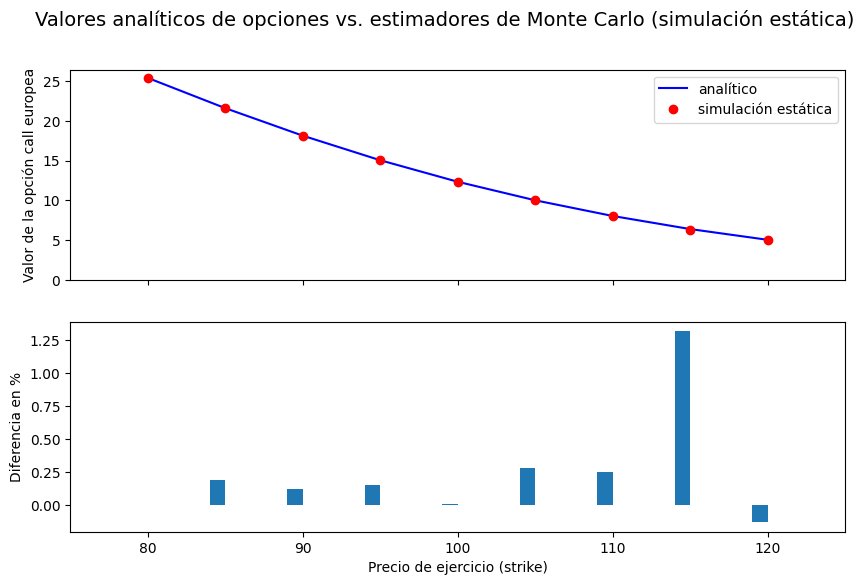

In [84]:
plt.figure(figsize=(10, 6))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Título
fig.suptitle('Valores analíticos de opciones vs. estimadores de Monte Carlo (simulación estática)', fontsize=14)

# Primer gráfico: comparación de valores
ax1.plot(k_list, anal_res, 'b', label='analítico')
ax1.plot(k_list, stat_res, 'ro', label='simulación estática')
ax1.set_ylabel('Valor de la opción call europea')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)

# Segundo gráfico: diferencia porcentual
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, width=wi)
ax2.set_xlabel('Precio de ejercicio (strike)')
ax2.set_ylabel('Diferencia en %')
ax2.set_xlim(left=75, right=125)


Una imagen similar se observa para el enfoque de **simulación y valuación dinámica**, cuyos resultados se muestran en la **Figura 12-16**.

Nuevamente, **todas las diferencias de valuación son menores al 1% en valor absoluto**, con desviaciones tanto **positivas como negativas**.

Como regla general, **la calidad del estimador de Monte Carlo puede controlarse ajustando** el número de **intervalos de tiempo $ M $** utilizados y/o el número de **trayectorias simuladas $ I $**.


(75.0, 125.0)

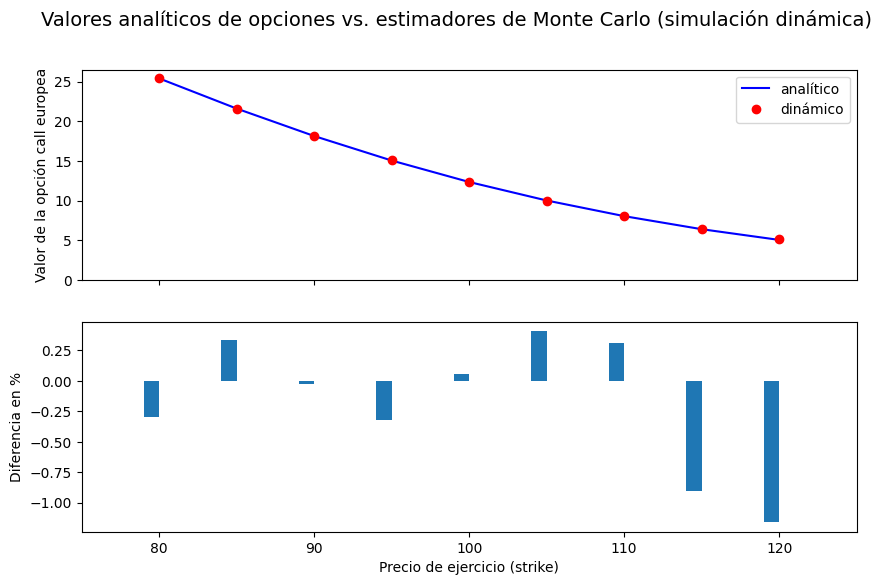

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Título
fig.suptitle('Valores analíticos de opciones vs. estimadores de Monte Carlo (simulación dinámica)', fontsize=14)

# Primer gráfico: comparación de valores
ax1.plot(k_list, anal_res, 'b', label='analítico')
ax1.plot(k_list, dyna_res, 'ro', label='dinámico')
ax1.set_ylabel('Valor de la opción call europea')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)

# Segundo gráfico: diferencia porcentual
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, width=wi)
ax2.set_xlabel('Precio de ejercicio (strike)')
ax2.set_ylabel('Diferencia en %')
ax2.set_xlim(left=75, right=125)


## Opciones Americanas

La **valuación de opciones americanas** es más compleja en comparación con las opciones europeas.

En este caso, se debe resolver un **problema de paro óptimo** (*optimal stopping*) para obtener un valor justo de la opción.

La formula la valuación de una opción americana como problema de paro.  
Esta formulación ya está basada en una **rejilla de tiempo discreta**, pensada para ser usada con simulaciones numéricas.

En cierto sentido, por lo tanto, es más correcto hablar del **valor de una opción Bermudana** (una opción que puede ejercerse solo en momentos discretos).

Cuando el **intervalo de tiempo tiende a cero**, el valor de la opción Bermudana **converge al valor de la opción Americana**.

---

### Valor de una opción americana como problema de paro óptimo
$$
\
V_0 = \sup_{\tau \in \{0, \Delta t, 2 \Delta t, \dots, T\}} e^{-r \tau} \, \mathbb{E}_0^{\mathbb{Q}} \left[ h_\tau(S_\tau) \right]
\
$$
Donde:

- $ \tau $: Momento óptimo de ejercicio (dentro del conjunto de tiempos discretos)
- $ h_\tau(S_\tau) $: Pago de la opción en el momento de ejercicio


## Algoritmo LSM para Opciones Americanas

El algoritmo descrito a continuación se llama **Least-Squares Monte Carlo (LSM)** y fue propuesto en el artículo de **Longstaff y Schwartz (2001)**.

Se puede demostrar que el valor de una **opción americana (o bermudana)** en cualquier fecha $ t $ está dado por:
$4
\
V_t(s) = \max \left( h_t(s), \, C_t(s) \right)
\
$$
donde:
$$
\
C_t(s) = \mathbb{E}_t^{\mathbb{Q}} \left[ e^{-r \Delta t} V_{t + \Delta t}(S_{t + \Delta t}) \,|\, S_t = s \right]
\
$$
es el llamado **valor de continuación** de la opción, dado un nivel del índice $S_t = s $.

---

Supongamos ahora que hemos simulado $ I $ trayectorias del índice a lo largo de $ M $ intervalos de tiempo de igual tamaño $ \Delta t $.

Definimos:
$$
\
Y_{t,i} \equiv e^{-r \Delta t} V_{t+\Delta t, i}
\
$$
como el **valor simulado de continuación** para la trayectoria $ i $ en el tiempo $ t $.

>No podemos usar directamente este valor porque implicaría tener **visión perfecta del futuro**.  
> Pero sí podemos usar el **conjunto transversal de todos estos valores simulados** para estimar el **valor esperado de continuación** mediante **regresión por mínimos cuadrados**.

---

Dado un conjunto de funciones base $ b_d $, $ d = 1, \dots, D $, el valor de continuación estimado para la trayectoria $i $ es:
$$
\
\hat{C}_{t,i} = \sum_{d=1}^D \alpha_{d,t}^* \cdot b_d(S_{t,i})
\
$$
donde los **parámetros óptimos de regresión** $ \alpha^* $ se obtienen resolviendo el siguiente problema de mínimos cuadrados:

---

### Ecuación 12-13. Regresión por mínimos cuadrados para opciones americanas
$$
\
\min_{\alpha_{1,t}, \dots, \alpha_{D,t}} \frac{1}{I} \sum_{i=1}^I \left( Y_{t,i} - \sum_{d=1}^D \alpha_{d,t} \cdot b_d(S_{t,i}) \right)^2
\
$$
---

La función `gbm_mcs_amer()` implementa el **algoritmo LSM** para opciones americanas tanto **call** como **put**.


In [87]:
def gbm_mcs_amer(K, option='call'):
    '''
    Valuación de opción americana en el modelo Black-Scholes-Merton
    mediante simulación de Monte Carlo usando el algoritmo LSM.

    Parámetros
    ==========
    K : float
        Precio de ejercicio (positivo) de la opción
    option : str
        Tipo de opción a valorar ('call' o 'put')

    Retorna
    =======
    C0 : float
        Valor presente estimado de la opción americana
    '''
    dt = T / M
    df = math.exp(-r * dt)  # factor de descuento

    # Simulación de trayectorias del índice
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)

    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                 sigma * math.sqrt(dt) * sn[t])

    # Cálculo del payoff según el tipo de opción
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)

    # Algoritmo LSM (Least Squares Monte Carlo)
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, deg=7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])

    # Estimador de Monte Carlo
    C0 = df * np.mean(V[1])
    return C0


In [88]:
gbm_mcs_amer(110., option='call')

np.float64(7.721705606305352)

In [89]:
gbm_mcs_amer(110., option='put')

np.float64(13.609997625418051)

El **valor europeo de una opción** representa un **límite inferior** para el valor de una opción americana.

La diferencia entre ambos valores se conoce generalmente como la **prima por ejercicio anticipado** (*early exercise premium*).

A continuación, se comparan los valores de opciones **europeas y americanas** para el **mismo rango de precios de ejercicio** utilizado anteriormente, esta vez utilizando **opciones put**, con el objetivo de **estimar la prima por ejercicio anticipado**.


In [90]:
euro_res = []
amer_res = []

In [91]:
k_list = np.arange(80., 120.1, 5.)

In [92]:
for K in k_list:
 euro_res.append(gbm_mcs_dyna(K, 'put'))
 amer_res.append(gbm_mcs_amer(K, 'put'))

In [93]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

(75.0, 125.0)

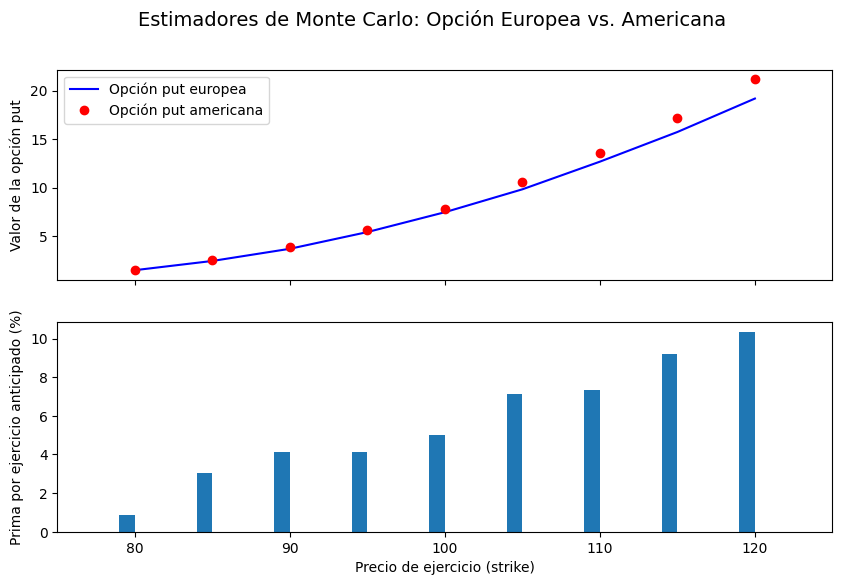

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Título
fig.suptitle('Estimadores de Monte Carlo: Opción Europea vs. Americana', fontsize=14)

# Primer gráfico: valores de opciones put
ax1.plot(k_list, euro_res, 'b', label='Opción put europea')
ax1.plot(k_list, amer_res, 'ro', label='Opción put americana')
ax1.set_ylabel('Valor de la opción put')
ax1.legend(loc=0)

# Segundo gráfico: prima por ejercicio anticipado (early exercise premium)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, width=wi)
ax2.set_xlabel('Precio de ejercicio (strike)')
ax2.set_ylabel('Prima por ejercicio anticipado (%)')
ax2.set_xlim(left=75, right=125)


# Medidas de Riesgo

Además de la **valuación**, la **gestión de riesgos** es otra área de aplicación clave de los métodos estocásticos y la simulación.

Esta sección ilustra el **cálculo/estimación de dos de las medidas de riesgo más comunes** aplicadas actualmente en la industria financiera.

---

### Value-at-Risk (VaR)

El **Value-at-Risk (VaR)** es una de las **medidas de riesgo más utilizadas** y también una de las más debatidas.

Amada por los practicantes por su **interpretación intuitiva**, pero muy discutida y **criticada en el ámbito teórico**, principalmente por su **capacidad limitada para capturar el riesgo de cola** (*tail risk*) —más sobre esto en breve.

En palabras simples, el **VaR** es un número **expresado en unidades monetarias** (por ejemplo, USD, EUR, JPY) que indica una **pérdida** (de un portafolio, una posición individual, etc.) que **no se espera superar con un cierto nivel de confianza (probabilidad)** en un periodo de tiempo dado.

---

### Ejemplo de interpretación

Supongamos una **posición en acciones** con un valor actual de **1 millón de USD**, y un **VaR de 50,000 USD** con un **nivel de confianza del 99%** en un periodo de **30 días** (un mes).

Esto significa que con una **probabilidad del 99%** (es decir, en 99 de cada 100 casos), **la pérdida en un plazo de 30 días no superará los 50,000 USD**.

 Sin embargo, **no nos dice nada sobre el tamaño de la pérdida si esta supera los 50,000 USD**.  
Es decir, no sabemos si la pérdida será de 100,000 o 500,000 USD, ni cuál es la probabilidad exacta de que ocurra una pérdida **mayor que el VaR**.  
Todo lo que dice es que **hay un 1% de probabilidad** de que ocurra una pérdida **de al menos 50,000 USD**.

---

### Simulación de niveles de índice para estimar el VaR

Asumamos el modelo de **Black-Scholes-Merton**, y consideremos la siguiente parametrización y simulación de niveles del índice en una fecha futura $ T = \frac{30}{365} $ (30 días).

Para estimar el VaR, se requieren los **beneficios y pérdidas absolutas simuladas**, ordenadas de **la peor pérdida hasta la mayor ganancia**.

Ahora se muestra el **histograma de los valores simulados de desempeño absoluto**.


In [96]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [97]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
 sigma * np.sqrt(T) * npr.standard_normal(I))

In [98]:
R_gbm = np.sort(ST - S0)

Text(0.5, 1.0, 'Pérdidas y ganancias absolutas de la simulación (geometric Brownian motion)')

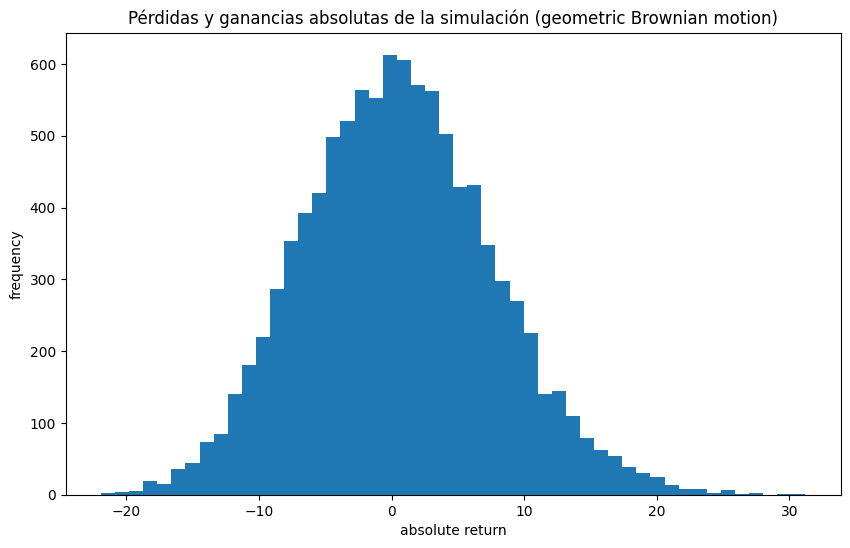

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.title('Pérdidas y ganancias absolutas de la simulación (geometric Brownian motion)')

In [101]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
 print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.814
           99.90           18.837
           99.00           15.230
           97.50           12.816
           95.00           10.824
           90.00            8.504


Como segundo ejemplo, recordemos el **modelo de difusión con saltos de Merton**, el cual se simula de manera dinámica.

En este caso, como el **componente de salto tiene una media negativa**, se observa algo similar a una **distribución bimodal** en las ganancias/pérdidas simuladas que se muestran en la **Figura 12-19**.

Desde el punto de vista de una distribución normal, se aprecia una **cola izquierda gruesa (fat tail)** pronunciada.


In [102]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [104]:
S = np.zeros((M + 1, I))
S[0] = S0

sn1 = npr.standard_normal((M + 1, I))  # componente browniano
sn2 = npr.standard_normal((M + 1, I))  # componente de salto
poi = npr.poisson(lamb * dt, (M + 1, I))  # número de saltos por paso

for t in range(1, M + 1):
    S[t] = S[t - 1] * (
        np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t])
        + (np.exp(mu + delta * sn2[t]) - 1) * poi[t]
    )
    S[t] = np.maximum(S[t], 0)  # evitar valores negativos del índice


In [105]:
R_jd = np.sort(S[-1] - S0)

Text(0.5, 1.0, 'Pérdidas y ganancias absolutas de la simulación (jump diffusion)')

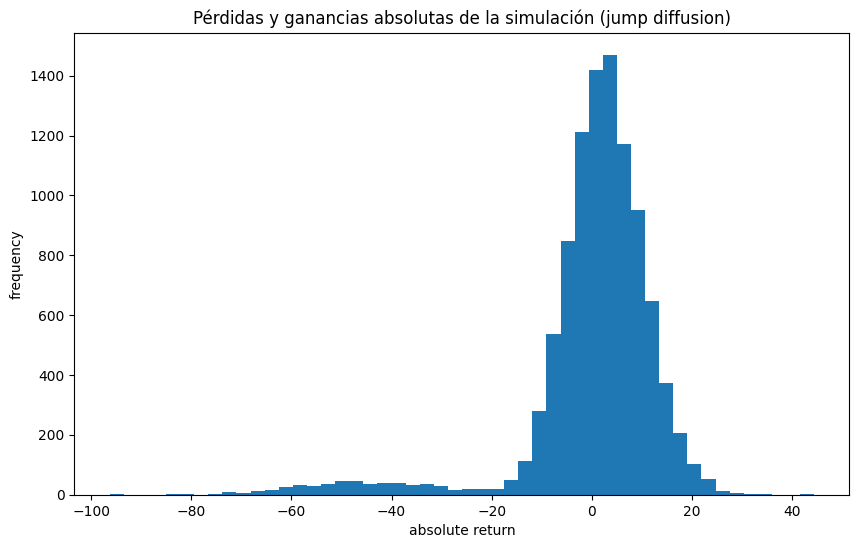

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.title('Pérdidas y ganancias absolutas de la simulación (jump diffusion)')

Para este proceso y parametrización, el **VaR a 30 días con un nivel de confianza del 90%** es **casi idéntico al obtenido con el movimiento browniano geométrico**.

Sin embargo, a un **nivel de confianza del 99.9%**, el VaR es **más de tres veces mayor** (70 frente a 18.8 unidades monetarias).


In [109]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           83.683
           99.90           71.862
           99.00           57.384
           97.50           46.620
           95.00           24.924
           90.00            8.985


Esto ilustra el **problema de capturar el riesgo de cola (tail risk)**, que se presenta con frecuencia en los mercados financieros, al usar la medida estándar de VaR.

Para reforzar aún más este punto, la  muestra finalmente los **valores de VaR para ambos casos** en una **comparación gráfica directa**.

Como revela la gráfica, los valores de VaR **se comportan de manera completamente diferente** al considerar un rango de niveles de confianza típicos.


In [110]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

(-100.73147826652834, 0.0)

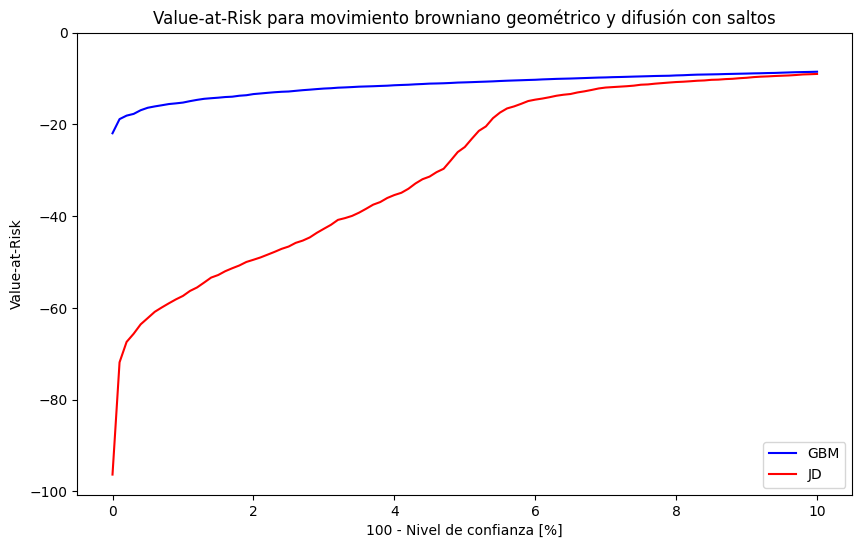

In [112]:
plt.figure(figsize=(10, 6))

# Título
plt.title('Value-at-Risk para movimiento browniano geométrico y difusión con saltos')

# Gráficas de VaR
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')  # VaR GBM
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')    # VaR Jump Diffusion

# Configuración del gráfico
plt.legend(loc=4)
plt.xlabel('100 - Nivel de confianza [%]')
plt.ylabel('Value-at-Risk')
plt.ylim(ymax=0.0)  # límite superior en el eje Y


## Ajustes por Valoración Crediticia (CVA)

Otras medidas de riesgo importantes son el **valor en riesgo crediticio (CVaR)** y el **ajuste por valoración crediticia (CVA)**, que se deriva del CVaR.

A grandes rasgos, el **CVaR mide el riesgo asociado a la posibilidad de que una contraparte no pueda cumplir con sus obligaciones**, por ejemplo, en caso de **quiebra**.

En tal situación, hay **dos supuestos principales** que deben considerarse:
1. La **probabilidad de incumplimiento** (*default*), y
2. El **nivel (promedio) de pérdida** en caso de que dicho incumplimiento ocurra.

---

Para concretarlo, consideremos nuevamente el modelo de referencia de **Black-Scholes-Merton** con la parametrización mostrada en el siguiente código.

En el caso más simple, se considera:
- Un nivel de pérdida promedio fijo $L $, y
- Una probabilidad fija $ p $ de incumplimiento **por año** por parte de la contraparte.

Usando la **distribución de Poisson**, se generan los **escenarios de incumplimiento** como se muestra a continuación, teniendo en cuenta que el incumplimiento **puede ocurrir solo una vez**.


In [113]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

In [114]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T
 + sigma * np.sqrt(T) * npr.standard_normal(I))

In [115]:
L=0.5

In [116]:
p=0.1

In [117]:
D = npr.poisson(p * T, I)

In [118]:
D = np.where(D > 1, 1, D)

Sin considerar el incumplimiento, el **valor bajo medida neutral al riesgo** del nivel futuro del índice debería ser **igual al valor actual del activo**, salvo por diferencias derivadas de errores numéricos.

El **CVaR** y el **valor presente del activo ajustado por riesgo crediticio** se calculan de la siguiente manera:


In [119]:
math.exp(-r * T) * np.mean(ST)

np.float64(99.88926187822548)

In [120]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST)
CVaR

np.float64(4.7219861301980846)

In [121]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
S0_CVA

np.float64(95.16727574802744)

In [122]:
S0_adj = S0 - CVaR
S0_adj

np.float64(95.27801386980191)

En este ejemplo particular de simulación, se observan aproximadamente **1,000 pérdidas debido al riesgo de crédito**, lo cual es esperable dado que se asumió una **probabilidad de incumplimiento del 1%** y se simularon **100,000 trayectorias**.

Se muestra la **distribución completa de frecuencias** de las pérdidas ocasionadas por incumplimiento.

Por supuesto, en la **gran mayoría de los casos** (es decir, en alrededor de **99,000 de los 100,000 casos**) **no se registra ninguna pérdida**.


In [123]:
np.count_nonzero(L * D * ST)

9478

(0.0, 175.0)

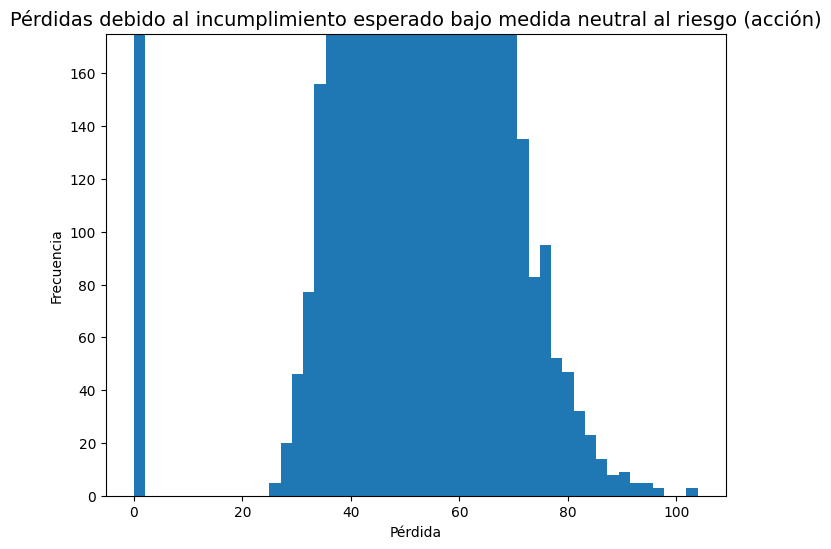

In [134]:
plt.figure(figsize=(8, 6))

# Título
plt.title('Pérdidas debido al incumplimiento esperado bajo medida neutral al riesgo (acción)', fontsize=14)

# Histograma de pérdidas
plt.hist(L * D * ST, bins=50)
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.ylim(ymax=175)


Consideremos ahora el caso de una **opción call europea**.

Su valor es de aproximadamente **10.4 unidades monetarias** con un **precio de ejercicio de 100**.

El **CVaR** (ajuste por riesgo de crédito) es de aproximadamente **5 centavos**, dadas las mismas suposiciones sobre la **probabilidad de incumplimiento** y el **nivel de pérdida**.


In [135]:
K = 100.
hT = np.maximum(ST - K, 0)

In [136]:
C0 = math.exp(-r * T) * np.mean(hT)
C0


np.float64(10.361917388521375)

In [137]:
CVaR = math.exp(-r * T) * np.mean(L * D * hT)
CVaR

np.float64(0.4861133286047083)

In [140]:
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)
C0_CVA

np.float64(9.875804059916664)

En comparación con el caso de un activo regular, el caso de una opción presenta características algo diferentes.

Solo se observan un poco más de **500 pérdidas debidas a incumplimiento**, aunque nuevamente hubo **1,000 incumplimientos en total**.

Esto se debe al hecho de que el **pago de la opción al vencimiento tiene una alta probabilidad de ser cero**.

Se muestra que el **CVaR para la opción** presenta una **distribución de frecuencias bastante diferente** en comparación con el caso del activo regular.


In [142]:
np.count_nonzero(L * D * hT)

5251

In [143]:
np.count_nonzero(D)

9478

In [144]:
I - np.count_nonzero(hT)

44182

(0.0, 350.0)

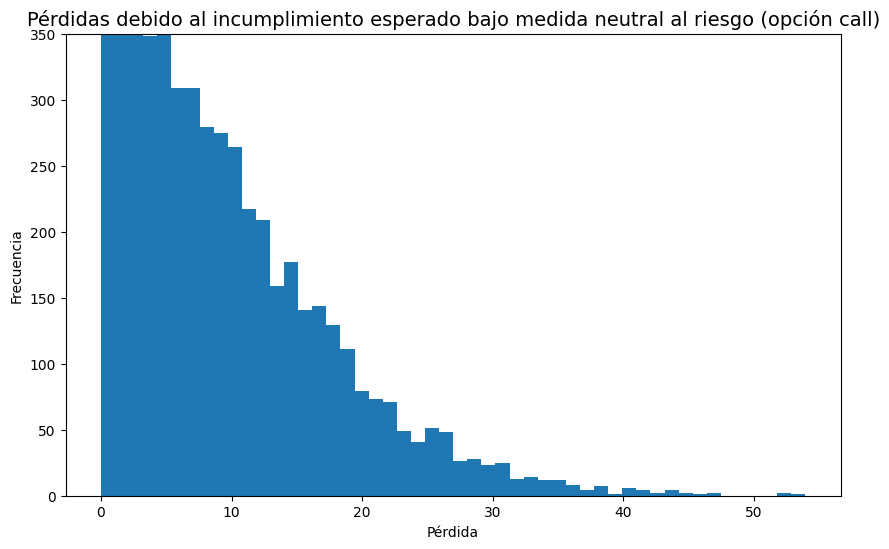

In [145]:
plt.figure(figsize=(10, 6))

# Título
plt.title('Pérdidas debido al incumplimiento esperado bajo medida neutral al riesgo (opción call)', fontsize=14)

# Histograma de pérdidas
plt.hist(L * D * hT, bins=50)
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.ylim(ymax=350)


## Conclusión

En este notebook hemos visto los **métodos y técnicas clave** para la **aplicación de la simulación de Monte Carlo en finanzas**.

En particular, muestra primero **cómo generar números aleatorios** basados en diferentes leyes de distribución.

Luego, se aborda la **simulación de variables aleatorias y procesos estocásticos**, lo cual es fundamental en muchas áreas financieras.

Se profundiza en **dos áreas de aplicación** relevantes:

1. La **valuación de opciones** con ejercicio **europeo y americano**.
2. La **estimación de medidas de riesgo** como el **Value-at-Risk (VaR)** y los **ajustes por valoración crediticia (CVA)**.
